In [31]:
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import classification_report
%matplotlib inline

In [2]:
df = pd.read_csv('satdetect.csv')

##                                                 Dataset

In [5]:
df.head(15)

,Timestamp,Name,Semester,CGPA,Satisfaction,How do you rate your CGPA?,Anything you want to say:
0,2021/08/08 11:45:16 PM GMT+6,Rafid Shad,10th,3.50,1,Good,Nope
1,2021/08/09 12:16:20 AM GMT+6,Shaikh Faisal Rahman,10th,3.85,1,Excellent,try hard as your best
2,2021/08/09 12:20:01 AM GMT+6,Md Nadimul Islam,10th,3.40,1,Good,Life is beautiful.
3,2021/08/09 12:43:42 AM GMT+6,Rifah Tasnia,11th,3.80,1,Good,NaN
4,2021/08/09 10:02:05 AM GMT+6,Puja Fouzder 181-15-10977,11th,3.75,1,Good,No
5,2021/08/17 12:08:37 PM GMT+6,Chandan Kumar sutradhar,10th,3.50,1,Average,Have relax.not for mind
6,2021/08/17 12:10:11 PM GMT+6,Nasimul Jahan Fahim,10th,3.70,1,Good,Valo Hoye Jau Bondhu🤐
7,2021/08/17 12:10:16 PM GMT+6,Khadiza Rahman,10th,3.75,1,Good,no
8,2021/08/17 12:11:54 PM GMT+6,Tauhid,10th,3.25,1,Good,NaN
9,2021/08/17 12:12:08 PM GMT+6,Fahima,10th,3.40,1,Average,Nope


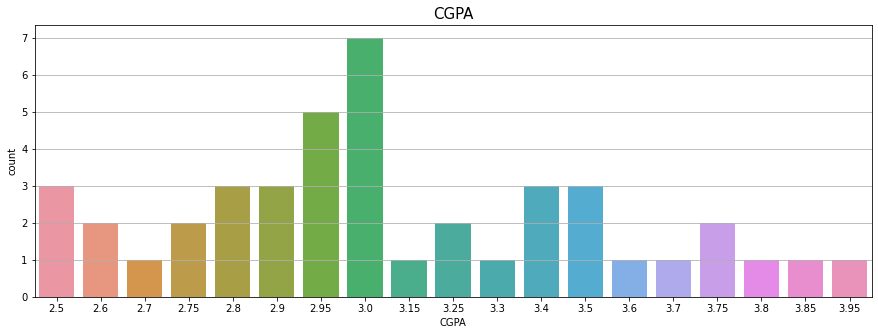

In [40]:
plt.figure(figsize=(15,5))
plt.grid()
sns.countplot(x='CGPA', data= df)
plt.title("CGPA", fontsize=15)
plt.show()

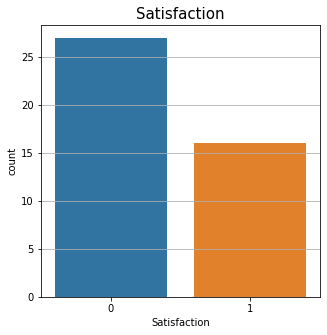

In [33]:

plt.figure(figsize=(5,5))
plt.grid()
sns.countplot(x='Satisfaction', data= df)
plt.title("Satisfaction", fontsize=15)
plt.show()

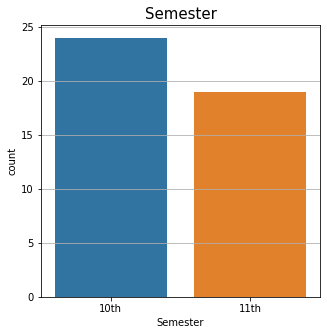

In [36]:
plt.figure(figsize=(5,5))
plt.grid()
sns.countplot(x='Semester', data= df)
plt.title("Semester", fontsize=15)
plt.show()

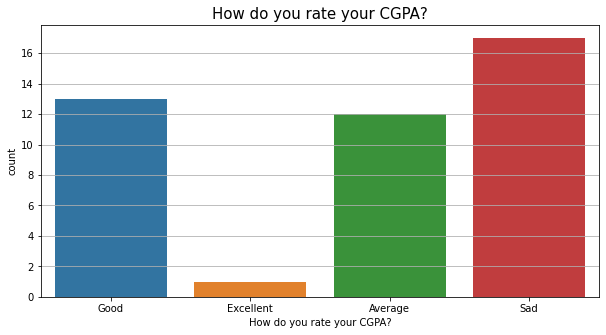

In [41]:
plt.figure(figsize=(10,5))
plt.grid()
sns.countplot(x='How do you rate your CGPA?', data= df)
plt.title("How do you rate your CGPA?", fontsize=15)
plt.show()

In [6]:
df.isnull().sum()

Timestamp                      0
Name                           0
Semester                       0
CGPA                           0
Satisfaction                   0
How do you rate your CGPA?     0
Anything you want to say:     24
dtype: int64

In [7]:
df['Satisfaction'].value_counts()

0    27
1    16
Name: Satisfaction, dtype: int64

In [8]:
x = df[['CGPA']]
y = df['Satisfaction']

In [9]:
print(x)

    CGPA
0   3.50
1   3.85
2   3.40
3   3.80
4   3.75
5   3.50
6   3.70
7   3.75
8   3.25
9   3.40
10  3.95
11  3.00
12  3.30
13  3.00
14  3.50
15  3.40
16  2.60
17  2.90
18  3.00
19  2.50
20  2.60
21  3.60
22  2.80
23  2.50
24  2.90
25  2.70
26  2.95
27  2.95
28  3.00
29  3.15
30  2.95
31  2.50
32  2.90
33  3.25
34  2.80
35  3.00
36  2.75
37  2.95
38  3.00
39  3.00
40  2.75
41  2.80
42  2.95


In [10]:
print(y)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    0
12    1
13    0
14    1
15    1
16    0
17    0
18    0
19    0
20    0
21    1
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    1
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
Name: Satisfaction, dtype: int64


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.30, random_state = 1)

In [13]:
print(x_test)

    CGPA
3   3.80
2   3.40
24  2.90
40  2.75
17  2.90
30  2.95
22  2.80
36  2.75
32  2.90
19  2.50
21  3.60
34  2.80
29  3.15


In [14]:
print(y_test)

3     1
2     1
24    0
40    0
17    0
30    0
22    0
36    0
32    0
19    0
21    1
34    0
29    0
Name: Satisfaction, dtype: int64


## Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [17]:
print(model.predict(x_test))

[1 1 0 0 0 0 0 0 0 0 1 0 0]


In [18]:
LR = model.predict(x_test)

## Classification Result

In [19]:
print(classification_report(LR, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



## Score

In [20]:
model.score(x_test, y_test)

1.0

Text(0.5, 1.0, 'Satisfiction predict Bar')

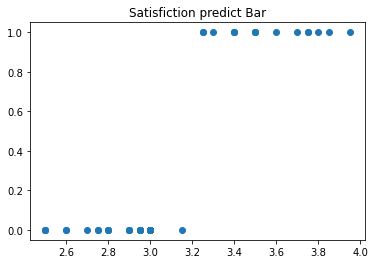

In [21]:
plt.scatter(df['CGPA'],df['Satisfaction'])
plt.title('Satisfiction predict Bar')

In [22]:
model.predict_proba(x_test)

array([[0.21016542, 0.78983458],
       [0.42254119, 0.57745881],
       [0.72154189, 0.27845811],
       [0.79108281, 0.20891719],
       [0.72154189, 0.27845811],
       [0.69543977, 0.30456023],
       [0.76941615, 0.23058385],
       [0.79108281, 0.20891719],
       [0.72154189, 0.27845811],
       [0.87693295, 0.12306705],
       [0.30615876, 0.69384124],
       [0.76941615, 0.23058385],
       [0.57929655, 0.42070345]])

In [23]:
pre = model.predict(x_test)
from sklearn.metrics import confusion_matrix
finalresult=confusion_matrix(y_test,pre)
print(finalresult)

[[10  0]
 [ 0  3]]


##  SVM

In [24]:
from sklearn.svm import SVC
model2 = SVC(kernel = 'linear', random_state = 1)
model2.fit(x_train,y_train)

SVC(kernel='linear', random_state=1)

In [42]:
print(model.predict(x_test))

[1 1 0 0 0 0 0 0 0 0 1 0 0]


## Score

In [29]:
model2.score(x_test, y_test)

1.0

## Classification Result

In [27]:
SV = model.predict(x_test)
print(classification_report(SV, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



In [28]:
pre = model2.predict(x_test)
from sklearn.metrics import confusion_matrix
finalresult=confusion_matrix(y_test,pre)
print(finalresult)

[[10  0]
 [ 0  3]]
